# Healthcare Diabetes
https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

By Adhitya Primandhika

## Import Libraries

First, we need to import required libraries that we need in this project.

In [173]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For data engineering
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# For machine learning and its evaluation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule, NearMiss, TomekLinks
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# For ignoring some warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

Next, we need to import the Diabetes Prediction Dataset as our dataset.

In [38]:
# Import our dataset
df = pd.read_csv("healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


## First Look on The Dataset

We need to know more about our dataset.

### Find The Information About The Dataset

From the dataset description, this dataset is a dataset to prediction for identifying individuals at risk of diabetes. This dataset contains ten columns, that are:
1. **Id**: Unique identifier for each data entry.
2. **Pregnancies**: Number of times pregnant.
3. **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
4. **BloodPressure**: Diastolic blood pressure (mm Hg).
5. **SkinThickness**: Triceps skinfold thickness (mm).
6. **Insulin**: 2-Hour serum insulin (mu U/ml).
7. **BMI**: Body mass index (weight in kg / height in m^2).
8. **DiabetesPedigreeFunction**: Diabetes pedigree function, a genetic score of diabetes.
9. **Age**: Age in years.
10. **Outcome**: Binary Classification indicating the presence (1) or absence (0) of diabetes.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


From the information shown above, show this dataset doesn't have any null values, has total 2768 datum, and mostly a numerical data types. Since this dataset has null values, we don't have to handle null values of the dataset in our data pre-processing.

## Exploratory Data Analysis (EDA)

Next, before we doing data pre-processing we need to do Exploratory Data Analysis to see our data distribution in our dataset.

In [40]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


From the result above we can see our desription about our data from mean for each column until standard deviation for each column.

### Show Visualization

<Figure size 1000x1000 with 0 Axes>

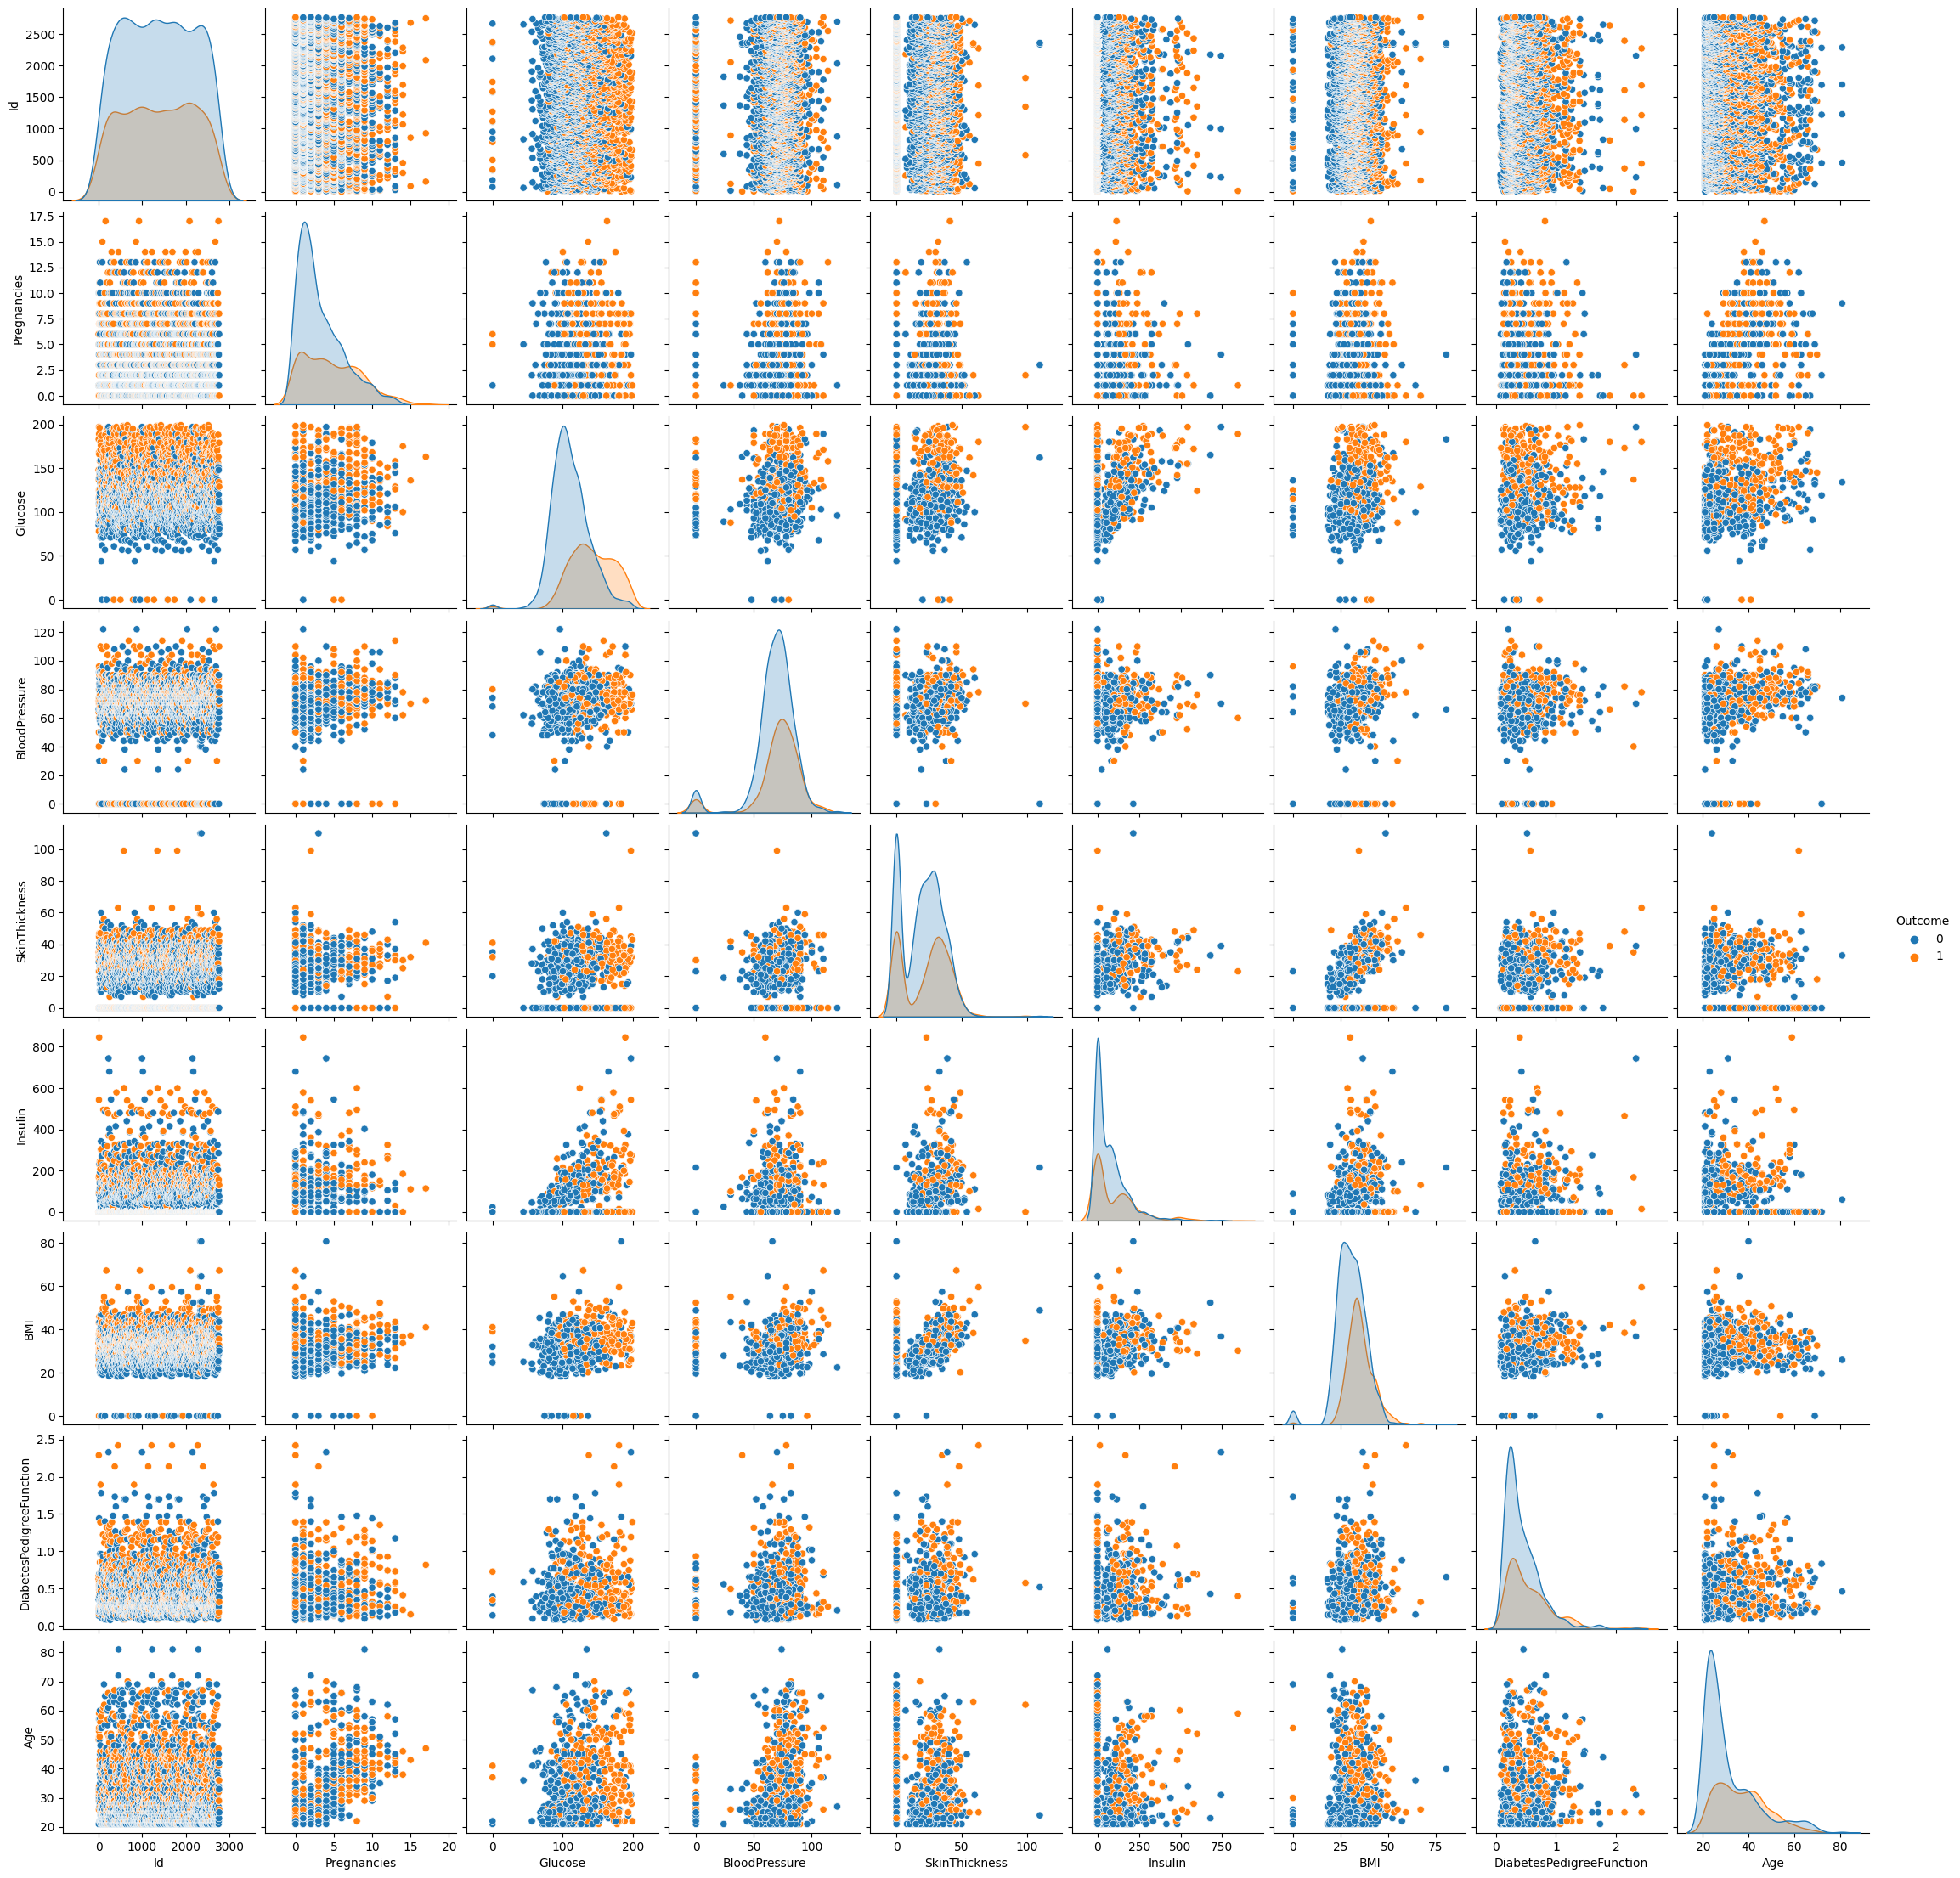

In [41]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue="Outcome")
plt.show()

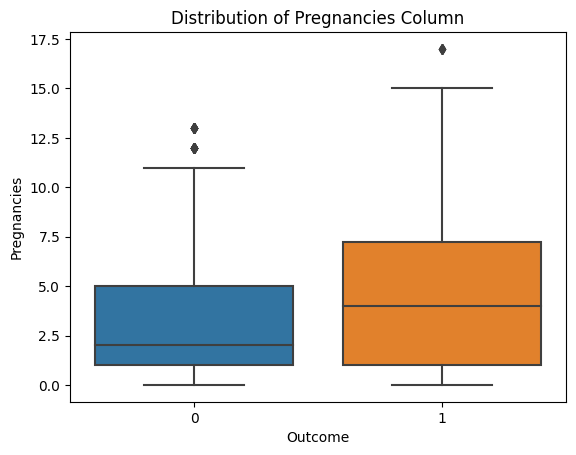

In [42]:
sns.boxplot(x=df["Outcome"], y=df["Pregnancies"])
plt.title("Distribution of Pregnancies Column")
plt.show()

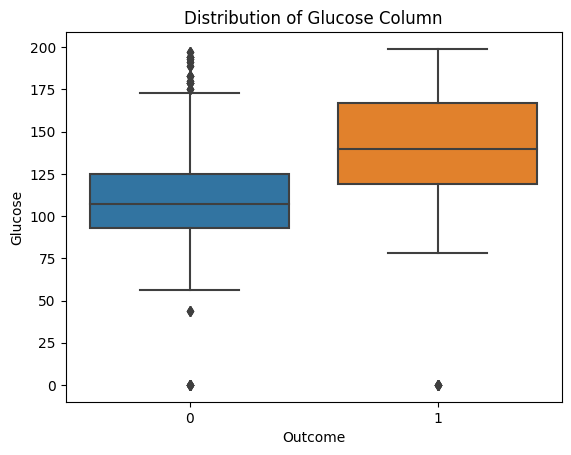

In [43]:
sns.boxplot(x=df["Outcome"], y=df["Glucose"])
plt.title("Distribution of Glucose Column")
plt.show()

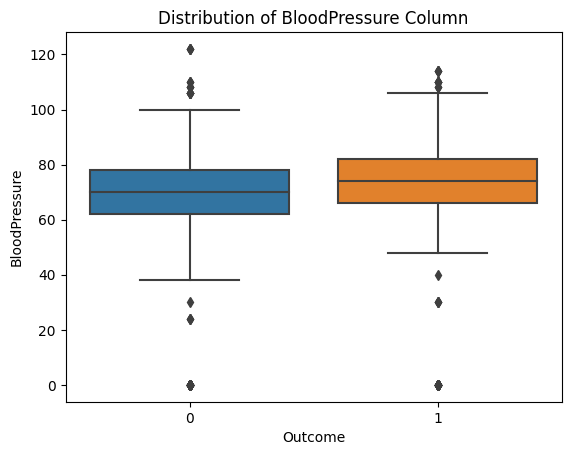

In [44]:
sns.boxplot(x=df["Outcome"], y=df["BloodPressure"])
plt.title("Distribution of BloodPressure Column")
plt.show()

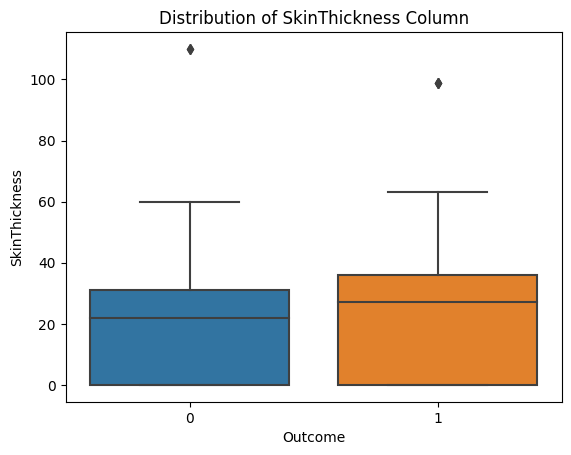

In [45]:
sns.boxplot(x=df["Outcome"], y=df["SkinThickness"])
plt.title("Distribution of SkinThickness Column")
plt.show()

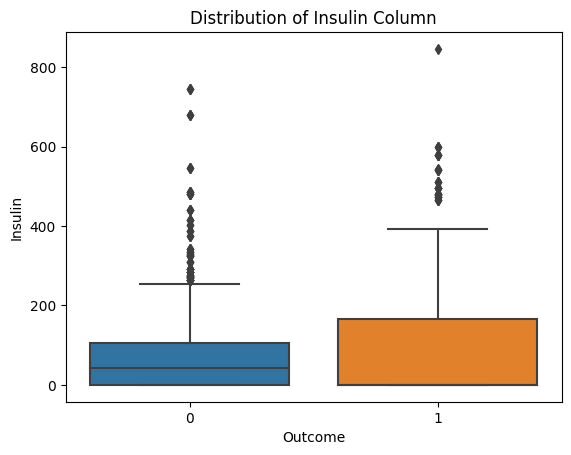

In [46]:
sns.boxplot(x=df["Outcome"], y=df["Insulin"])
plt.title("Distribution of Insulin Column")
plt.show()

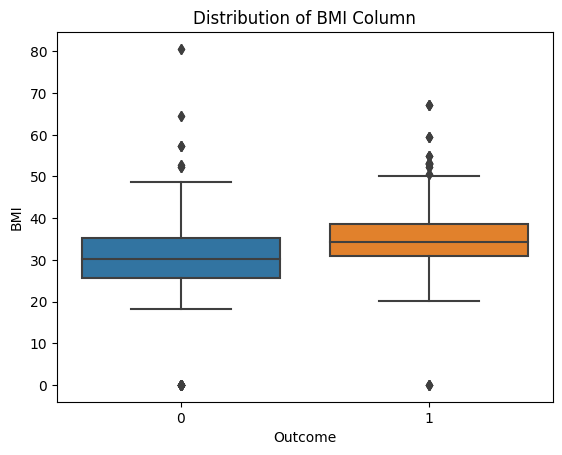

In [47]:
sns.boxplot(x=df["Outcome"], y=df["BMI"])
plt.title("Distribution of BMI Column")
plt.show()

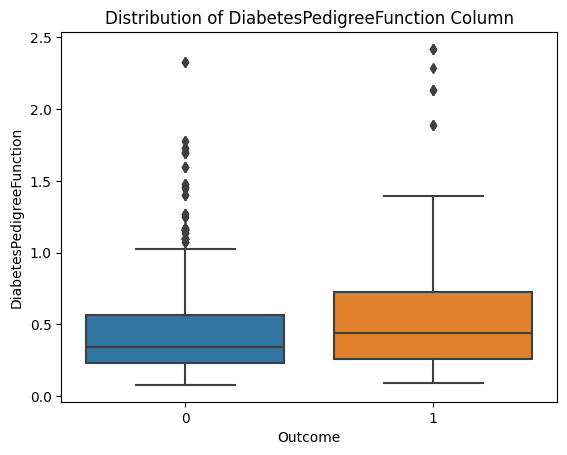

In [48]:
sns.boxplot(x=df["Outcome"], y=df["DiabetesPedigreeFunction"])
plt.title("Distribution of DiabetesPedigreeFunction Column")
plt.show()

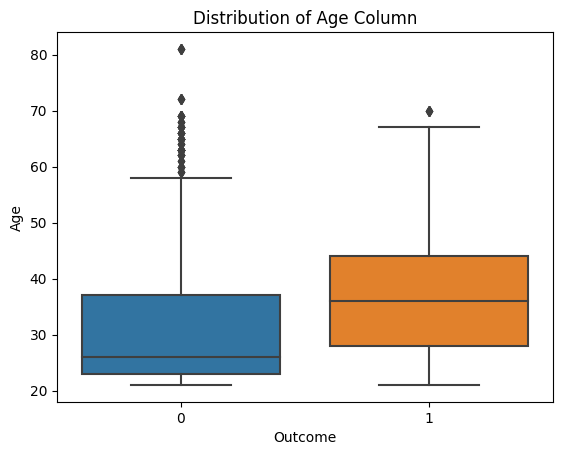

In [49]:
sns.boxplot(x=df["Outcome"], y=df["Age"])
plt.title("Distribution of Age Column")
plt.show()

From the visualization of data distribution above, we can see that the distribution for each column not exactly has normal distribution.

### Distribution of Target Column

Now, we will check the distribution of Outcome Column to see if it's balanced or imbalanced.

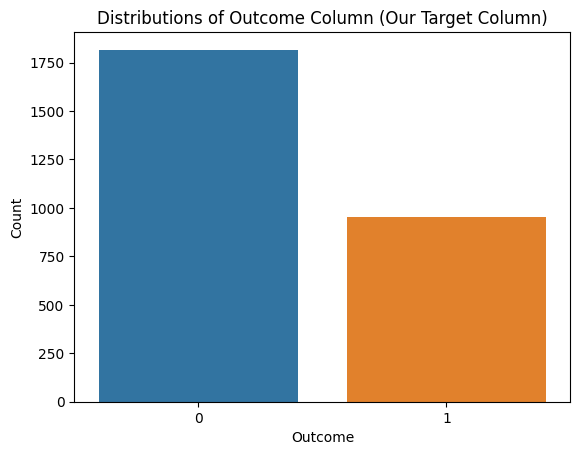

In [56]:
sns.countplot(x=df["Outcome"])
plt.title("Distributions of Outcome Column (Our Target Column)")
plt.ylabel("Count")
plt.show()

As we see above, our data is imbalanced. So, when we will build our ML model we need to handling the imbalanced data first.

### Check Correlation

Next, we will check the correlation with our target column, Outcome.

In [51]:
df.corr().style.background_gradient(cmap="viridis")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


From the result for correlation above, we can see that number of glucose has the highest correlation with the outcome with 0.460644. I means that the higher concentration of glucose, the higher risk for the diabetes.  

## Data Pre-Processing

### Drop Unnecessary Column

Since there is Id column that we don't really need for our machine learning model, so we can drop the Id column.

In [50]:
# Drop Id column
df = df.drop(["Id"], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Preparing Data Into X (Features) and y (Target)

We will create X and y where X is our features and y as our target column. In this problem, our target is Outcome.

In [57]:
# Prepare X and y
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

# Show the shape of X and y
print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (2768, 8)
y Shape: (2768,)


In [59]:
# Show X
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33
2764,8,179,72,42,130,32.7,0.719,36
2765,6,85,78,0,0,31.2,0.382,42
2766,0,129,110,46,130,67.1,0.319,26


In [60]:
# Show y
y

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

In [93]:
# Show number of each class before resampling
y.value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

### Train, Test, Validation Data Splitting Before Resampling

Next, we will split our data into 3 parts, training data, testing data, and validation data with the ratio 80%, 10%, and 10% respectively.

In [104]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))
print("Data split done")
print("---------------------------------------")
print("X")
print("---------------------------------------")
print(f"X_train shape      : {X_train.shape}")
print(f"X_test shape       : {X_test.shape}")
print(f"X_validation shape : {X_valid.shape}")
print("---------------------------------------")
print()
print("---------------------------------------")
print("y")
print("---------------------------------------")
print(f"y_train shape      : {y_train.shape}")
print(f"y_test shape       : {y_test.shape}")
print(f"y_validation shape : {y_valid.shape}")
print("---------------------------------------")

Data split done
---------------------------------------
X
---------------------------------------
X_train shape      : (2214, 8)
X_test shape       : (277, 8)
X_validation shape : (277, 8)
---------------------------------------

---------------------------------------
y
---------------------------------------
y_train shape      : (2214,)
y_test shape       : (277,)
y_validation shape : (277,)
---------------------------------------


## Create Machine Learning Model

Next, we will create our ML model for our problem here.

### Handling The Imbalanced Data

First, we will handling the imbalanced data in our dataset to make sure get a good ML model.

In [156]:
ncl = NeighbourhoodCleaningRule()
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_undersampled, y_undersampled = ncl.fit_resample(X, y)
X_resampled, y_resampled = smote.fit_resample(X_undersampled, y_undersampled)


In [157]:
# Show number of each class before resampling
y_resampled.value_counts()

Outcome
1    1716
0    1716
Name: count, dtype: int64

### Train, Test, Validation Data Splitting After Resampling

Next, we will split our data into 3 parts, training data, testing data, and validation data with the ratio 80%, 10%, and 10% respectively.

In [159]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size = test_ratio, random_state = 0)
X_train_resampled, X_valid_resampled, y_train_resampled, y_valid_resampled = train_test_split(X_train_resampled, y_train_resampled, test_size=validation_ratio/(train_ratio+test_ratio))
print("Data split done")
print("---------------------------------------")
print("X")
print("---------------------------------------")
print(f"X_train shape      : {X_train_resampled.shape}")
print(f"X_test shape       : {X_test_resampled.shape}")
print(f"X_validation shape : {X_valid_resampled.shape}")
print("---------------------------------------")
print()
print("---------------------------------------")
print("y")
print("---------------------------------------")
print(f"y_train shape      : {y_train_resampled.shape}")
print(f"y_test shape       : {y_test_resampled.shape}")
print(f"y_validation shape : {y_valid_resampled.shape}")
print("---------------------------------------")

Data split done
---------------------------------------
X
---------------------------------------
X_train shape      : (2744, 8)
X_test shape       : (344, 8)
X_validation shape : (344, 8)
---------------------------------------

---------------------------------------
y
---------------------------------------
y_train shape      : (2744,)
y_test shape       : (344,)
y_validation shape : (344,)
---------------------------------------


### Select The Best Model

Next, we will try to compare some algorithms to choose the best one.

Extra Trees: 0.967932 (0.015306)
Random Forest: 0.970639 (0.012322)
XGBoost: 0.966575 (0.011102)
Decision Tree: 0.967924 (0.013933)
SVM: 0.822926 (0.026105)
Gradient Boosting: 0.872190 (0.026071)


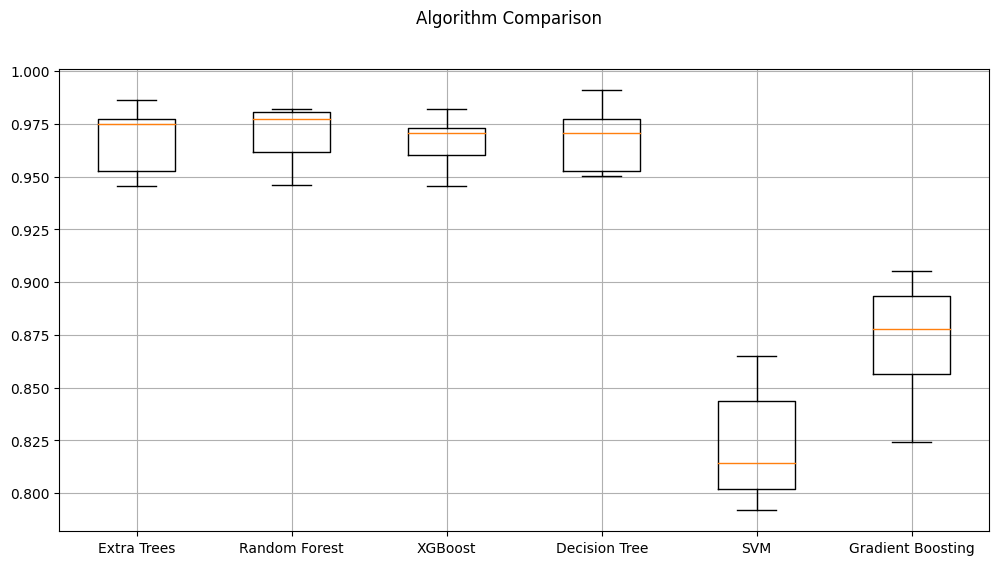

In [162]:
# List of models
models = []
models.append(("Extra Trees", ExtraTreesClassifier()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("XGBoost", XGBClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("SVM", SVC()))
models.append(("Gradient Boosting", GradientBoostingClassifier()))

results = []
names = []
scoring = "accuracy"
for name, model in models:
    pipeline = imbpipeline(steps = [["smote", SMOTE(random_state=10)], ["ncl", NeighbourhoodCleaningRule()], ["scaler", RobustScaler()], ["classifier", model]])
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Show the comparisons through visualization
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

From the comparison above, we can see that Random Forest algorithm has the highest median for the accuracy, reasonable Interquartile Range, and less outliers. So we will use Random Forest as our model.

### Create Pipeline, Hyperparameter Tuning, and Random Forest Model

Next, we will create pipeline, do hyperparameter tuning, and create Random Forest Model.

In [175]:
# Create a pipeline with data pre-processing and our ML model
pipeline = imbpipeline(steps = [["smote", SMOTE(random_state=10)], 
                                         ["ncl", NeighbourhoodCleaningRule()], 
                                         ["scaler", RobustScaler()], 
                                         ["classifier", RandomForestClassifier()]])

# Define parameters and its values to be tuned
param_grid = {
    "classifier__n_estimators": [50, 100, 150, 200, 500, 1000],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4, 8]
}

# Initialize the hyperparameter tuning within the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_valid, y_valid)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Best Score: 0.787077922077922


Now, we get our best values for each parameter for our model and its ready to be implemented on our final model.

In [176]:
# Get the best model from the grid search pipeline
best_pipeline = grid_search.best_estimator_

# Evaluate the pipeline on the testing set
accuracy = best_pipeline.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.7906137184115524


We get not so bad testing accuracy for our pipeline using the best params from hyperparameter tuning that is 0.79. We will see how it work with training with training data and testing using testing data.

### Evaluate Model

Now, we will evaluate our model by implemnting our model using the best params from hyperparameter tuning.

In [178]:
# Create final model
final_model = imbpipeline(steps = [["smote", SMOTE(random_state=10)], 
                                         ["ncl", NeighbourhoodCleaningRule()], 
                                         ["scaler", RobustScaler()], 
                                         ["classifier", RandomForestClassifier(n_estimators=grid_search.best_params_["classifier__n_estimators"],
                                     max_depth=grid_search.best_params_["classifier__max_depth"],
                                     min_samples_split=grid_search.best_params_["classifier__min_samples_split"],
                                     min_samples_leaf=grid_search.best_params_["classifier__min_samples_leaf"])]])

# Fit the final model on the training data
final_model.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=10)),
                ('ncl', NeighbourhoodCleaningRule()),
                ('scaler', RobustScaler()),
                ['classifier', RandomForestClassifier(n_estimators=150)]])

In [180]:
# Predict using the pipeline
y_pred = final_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [181]:
# Evaluate final model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy  : {accuracy}")
print(f"F1 Score  : {f1}")
print(f"Precision : {precision}")
print(f"Recall    : {recall}")

Accuracy  : 0.9675090252707581
F1 Score  : 0.9419354838709678
Precision : 0.9733333333333334
Recall    : 0.9125


So, from the model evaluation we got accuracy for 0.97, f1 score for 0.94, precision for 0.97, and recall for 0.91 which all of the results show that our model got pretty good results for binary classification that we do. 

## Save Model

Lastly, we will save our final model pipeline using joblib.

In [182]:
joblib.dump(final_model, "final_model.pkl")
print("Saving model done")

Saving model done
